## Line Plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

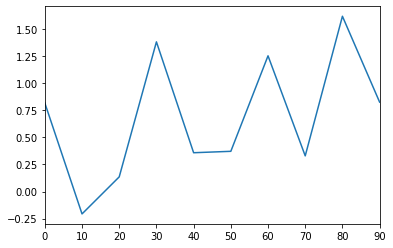

In [2]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s.plot()

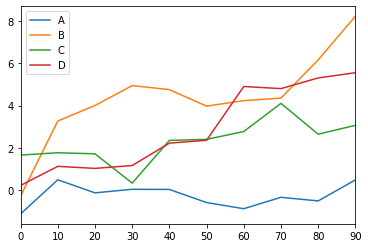

In [3]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
   ....:                   columns=['A', 'B', 'C', 'D'],
   ....:                   index=np.arange(0, 100, 10))
df.plot()

![Series.plot method arguments](./figs/9-3.jpg)

![Series.plot method arguments](./figs/9-4.jpg)

### Bar Plots

- plot.bar()
- plot.barh()

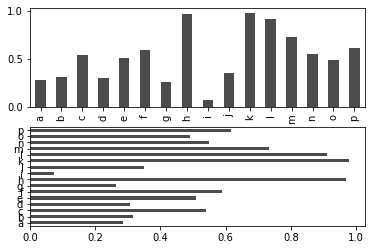

In [4]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [5]:
# with a DataFrame, bar plots group the values in each row together
df = pd.DataFrame(np.random.rand(6, 4),
                   index=['one', 'two', 'three', 'four', 'five', 'six'],
                   columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.140448,0.970892,0.568518,0.918785
two,0.395078,0.977270,0.763575,0.494458
three,0.992701,0.230404,0.891779,0.461405
four,0.060692,0.256095,0.710817,0.974803
five,0.894874,0.121316,0.400397,0.929958
six,0.544187,0.883371,0.401038,0.331495


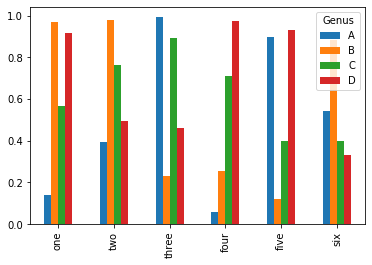

In [6]:
df.plot.bar()

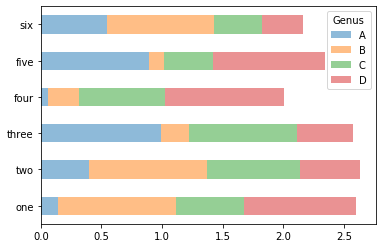

In [7]:
df.plot.barh(stacked=True, alpha=0.5)

In [8]:
tips = pd.read_csv('./dataset/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [9]:
party_counts = party_counts.loc[:, 2:5]
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


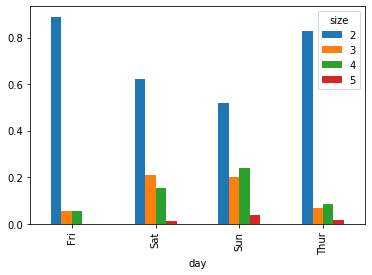

In [10]:
party_pcts.plot.bar()

In [11]:
# using seaborn pacage
import seaborn as sns

In [12]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


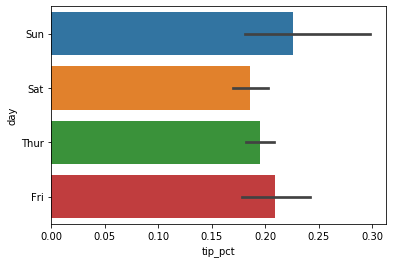

In [13]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

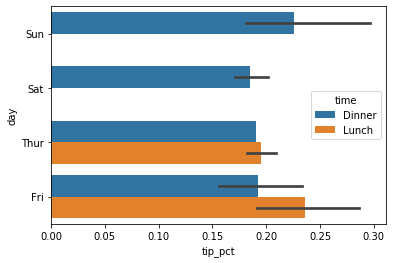

In [14]:
# seaborn.barplot  has a  hue  option that enables us to split by an additional categorical value
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [15]:
sns.set(style="whitegrid")

## Histograms and Density Plots

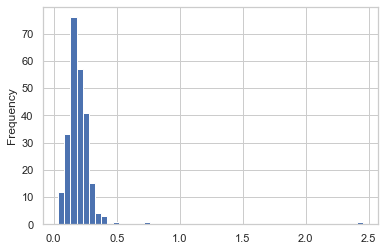

In [16]:
tips['tip_pct'].plot.hist(bins=50)

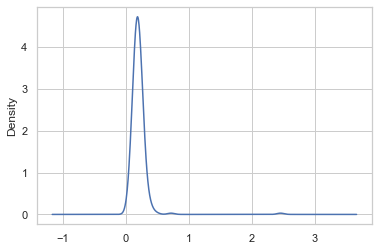

In [17]:
tips['tip_pct'].plot.density()

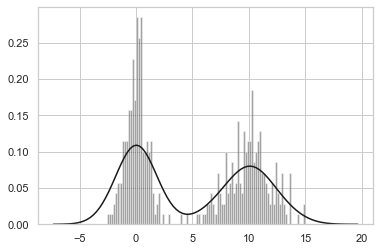

In [18]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

## Scatter or Point Plots

In [19]:
macro = pd.read_csv('dataset/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

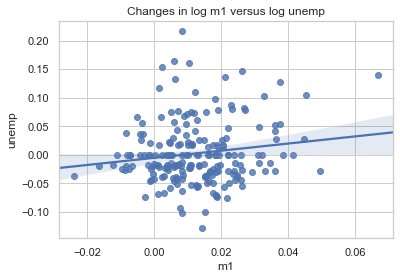

In [20]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

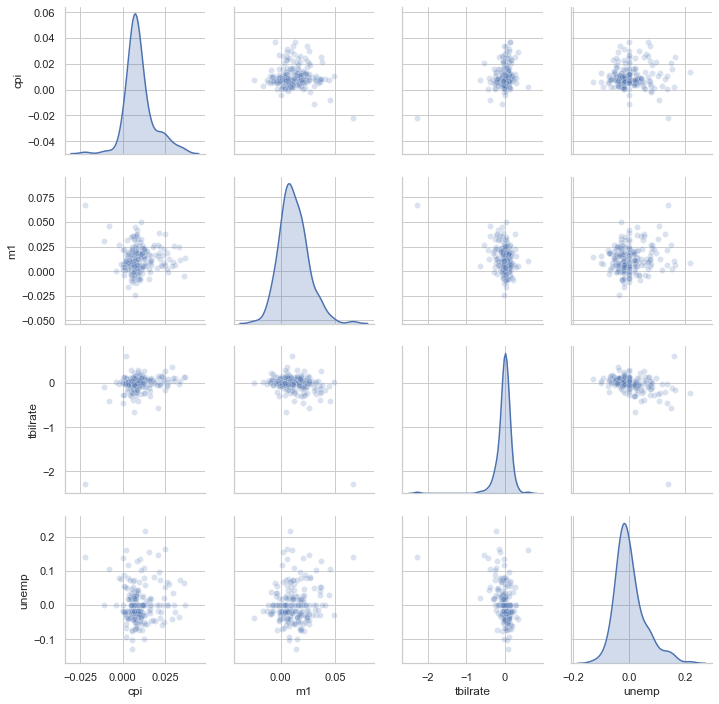

In [21]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

## Facet Grids and Categorical Data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


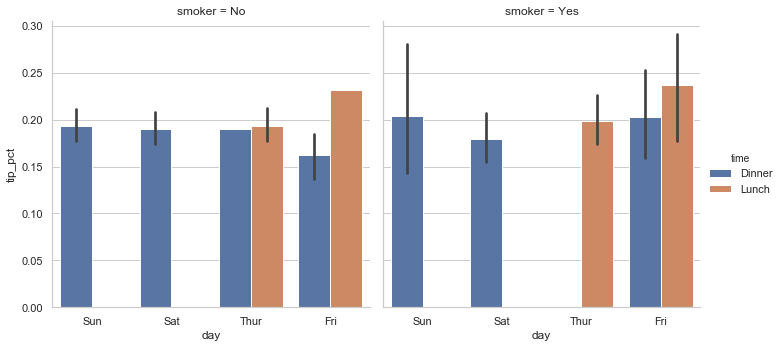

In [22]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
                kind='bar', data=tips[tips.tip_pct < 1])

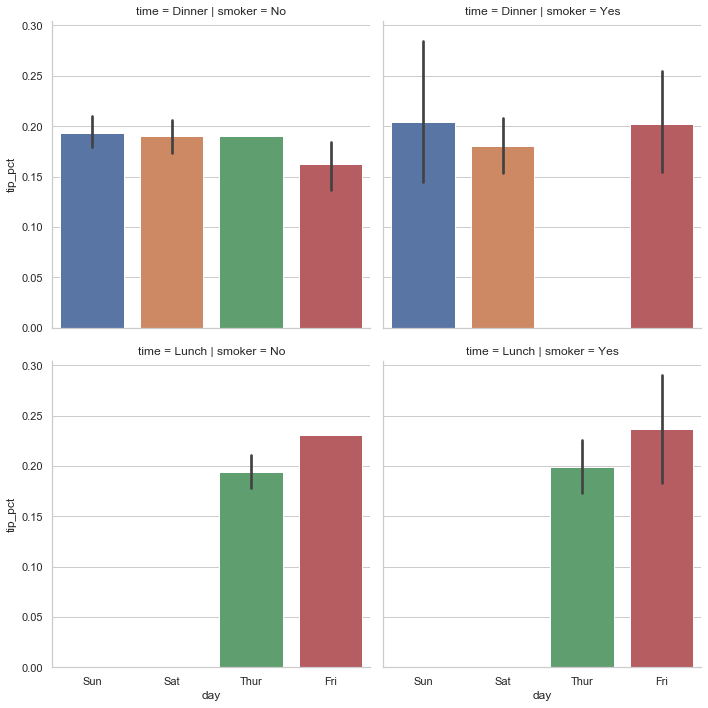

In [23]:
sns.factorplot(x='day', y='tip_pct', row='time',
                col='smoker',
                kind='bar', data=tips[tips.tip_pct < 1])

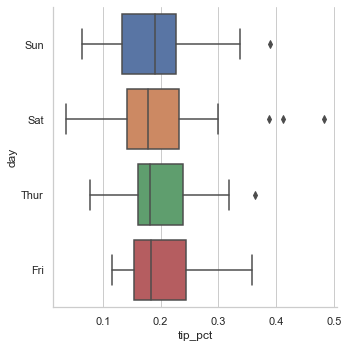

In [24]:
sns.factorplot(x='tip_pct', y='day', kind='box',
                data=tips[tips.tip_pct < 0.5])